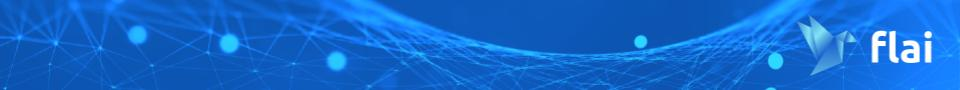

## **Aula 11 - DDS4 - Pre-processamendo de Dados**

---
## **Importação e Preparação dos Dados**

In [14]:
import pandas as pd
url = 'https://raw.githubusercontent.com/gitflai/DDS4/main/Churn_Modelling.csv'
dados = pd.read_csv(url)
dados.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
dados['Surname'].value_counts()

Smith         32
Scott         29
Martin        29
Walker        28
Brown         26
              ..
Allardyce      1
Amies          1
Greathouse     1
McGuirk        1
Standish       1
Name: Surname, Length: 2932, dtype: int64

In [16]:
X = dados.drop(['Exited'], axis = 1) 
y = dados['Exited']

In [17]:
X.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


## **Análise Exploratória dos Dados** 

In [18]:
# instalando biblioteca de visualização

!pip install sweetviz 

     |████████████████████████████████| 15.1MB 247kB/s 
     |████████████████████████████████| 81kB 10.6MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [19]:
import sweetviz as sv

In [20]:
eda = sv.analyze(source = dados, 
                 target_feat = 'Exited')

                                             |          | [  0%]   00:00 -> (? left)


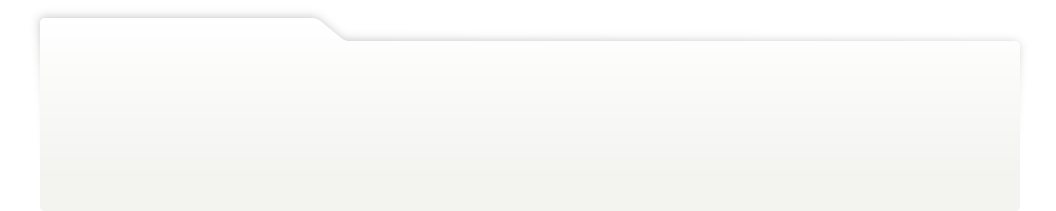
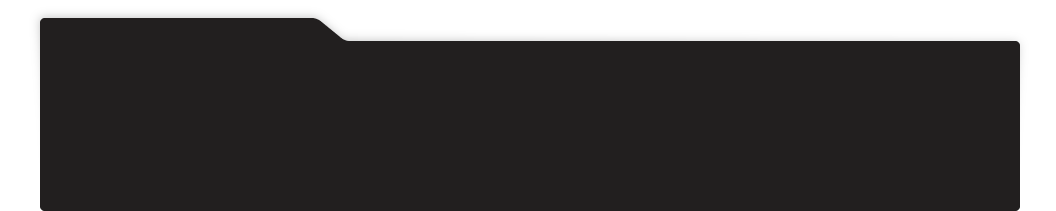
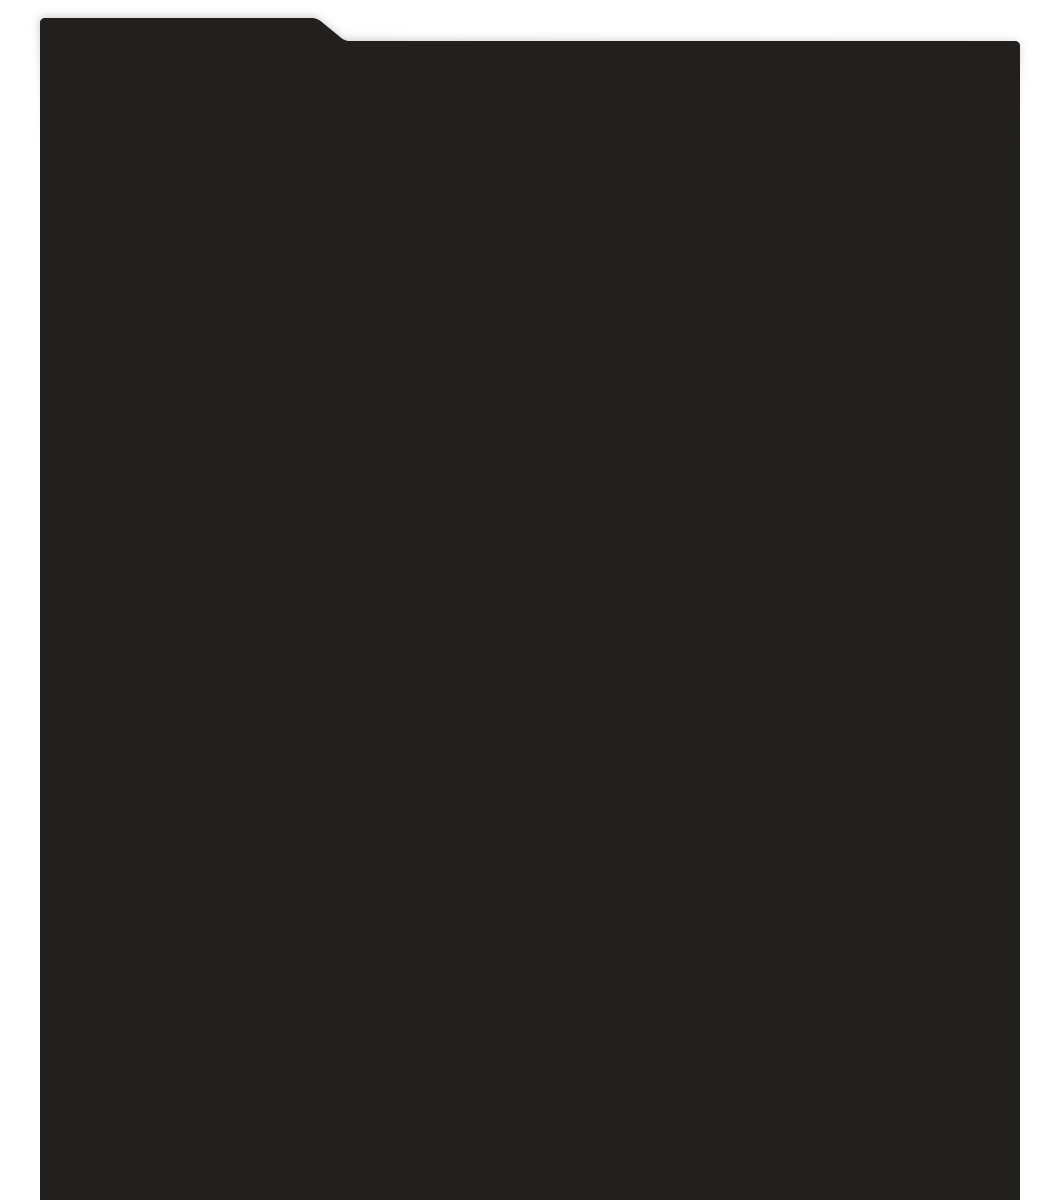
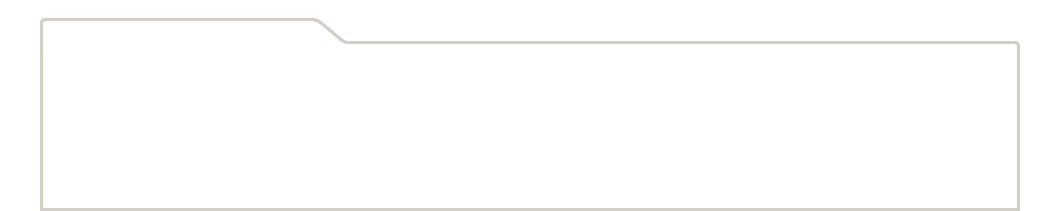
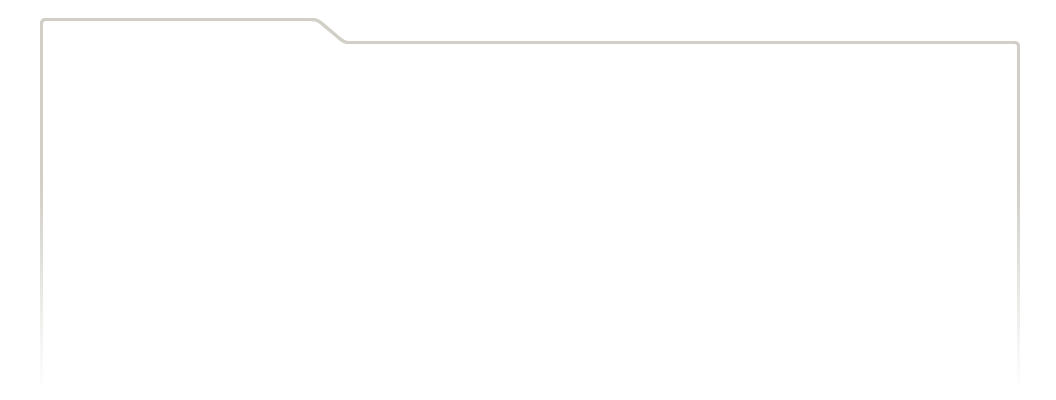
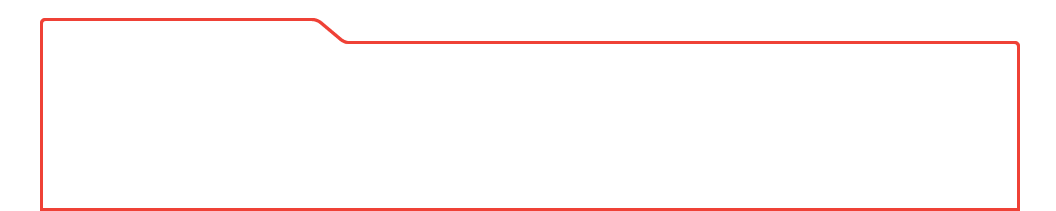
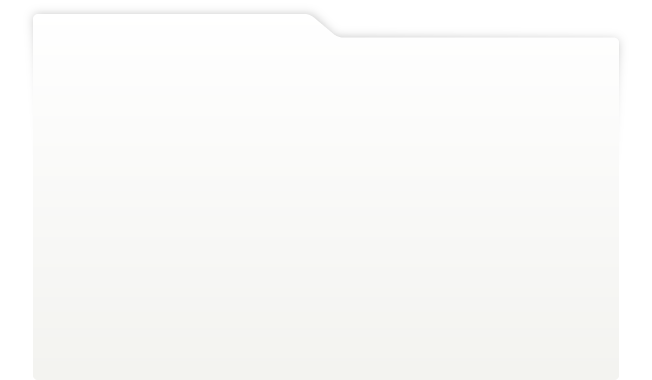
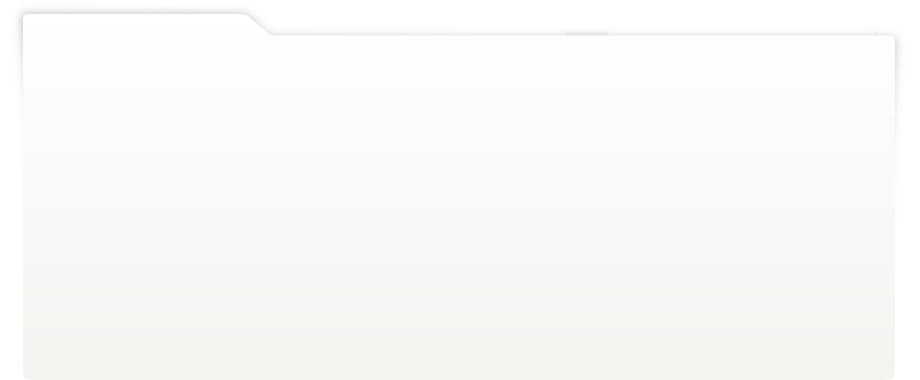
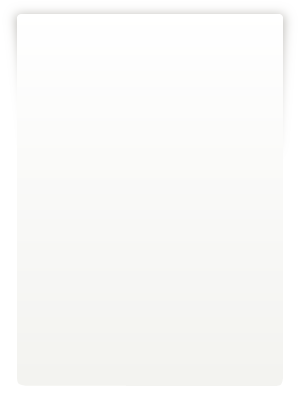
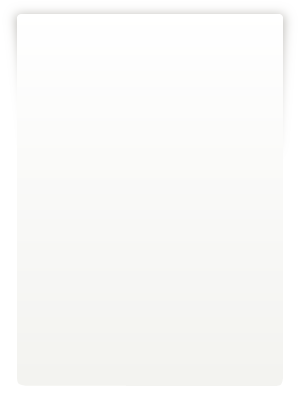
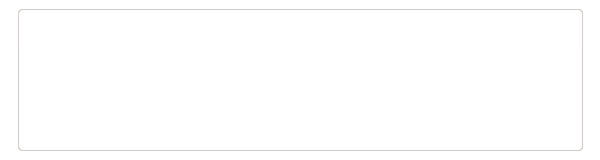
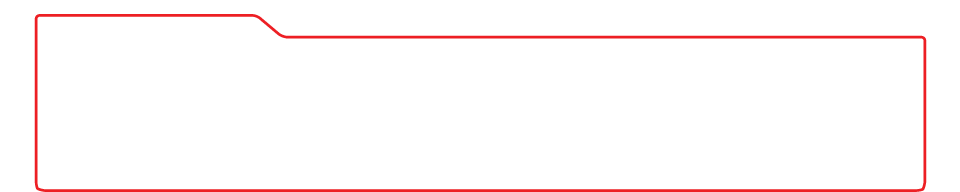
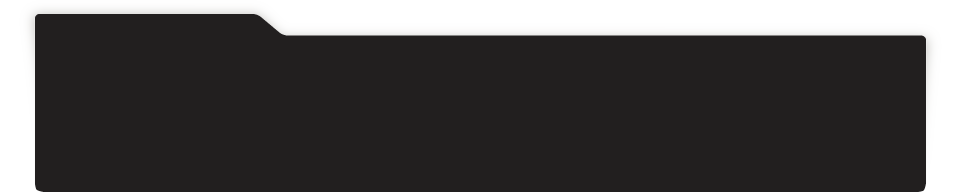
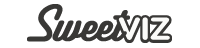
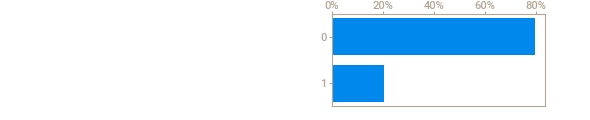
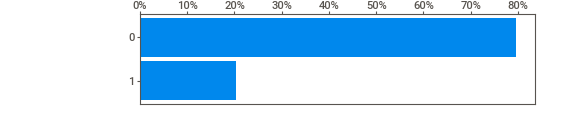
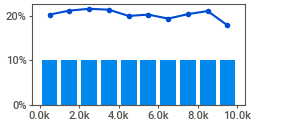
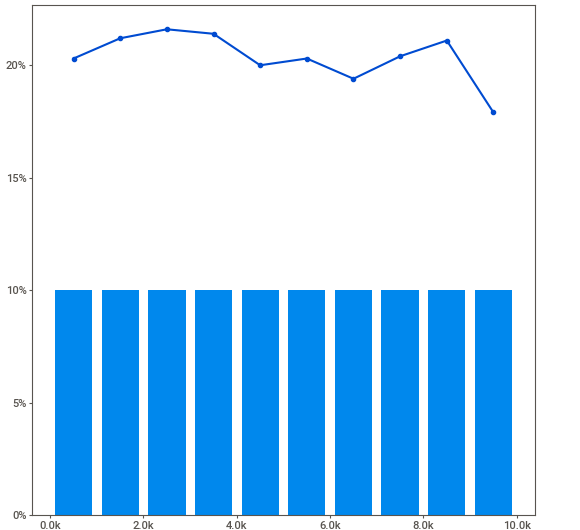
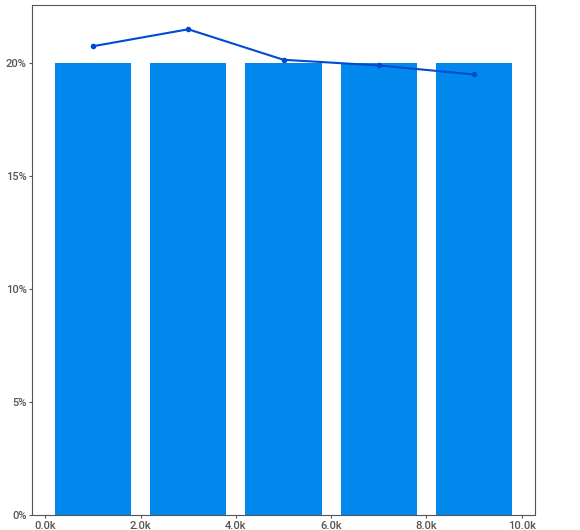
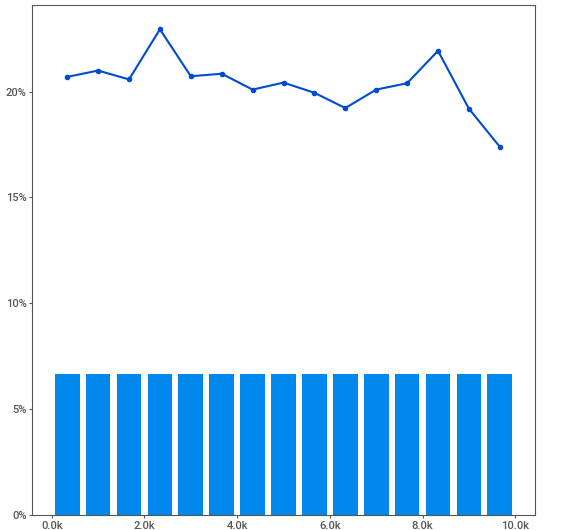
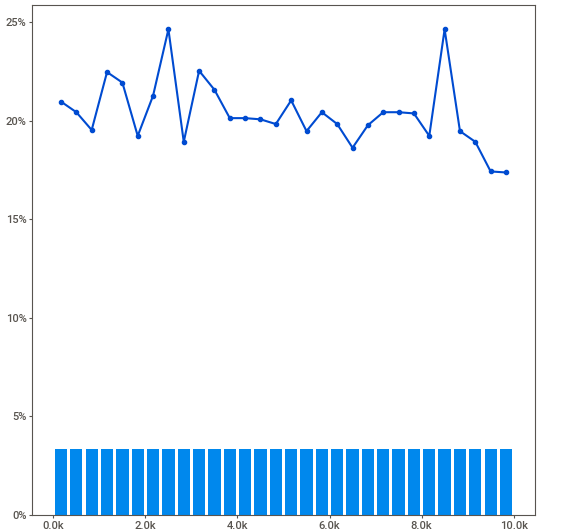
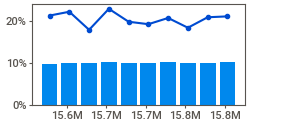
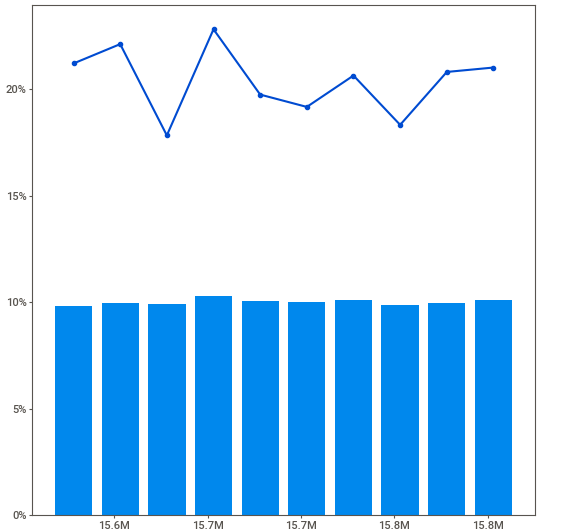
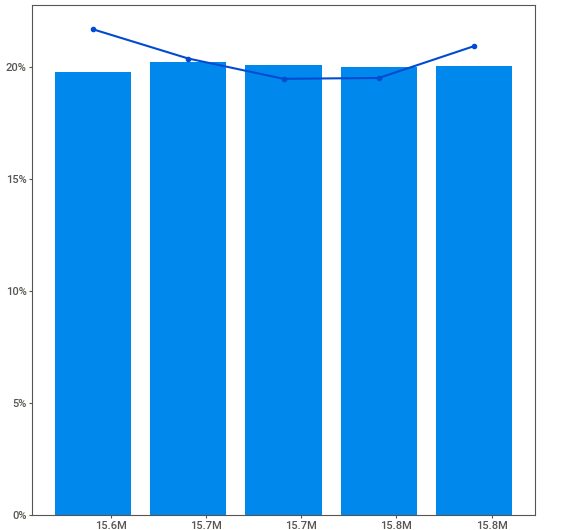
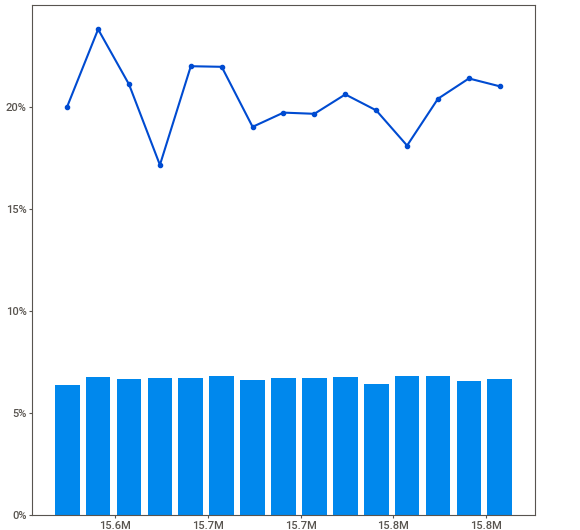
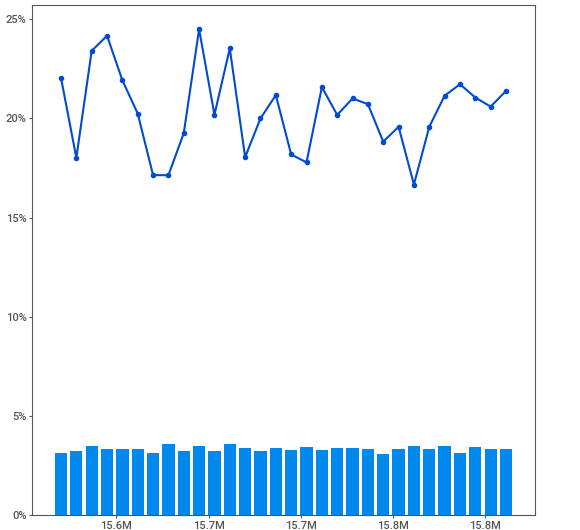
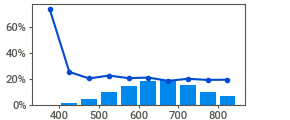
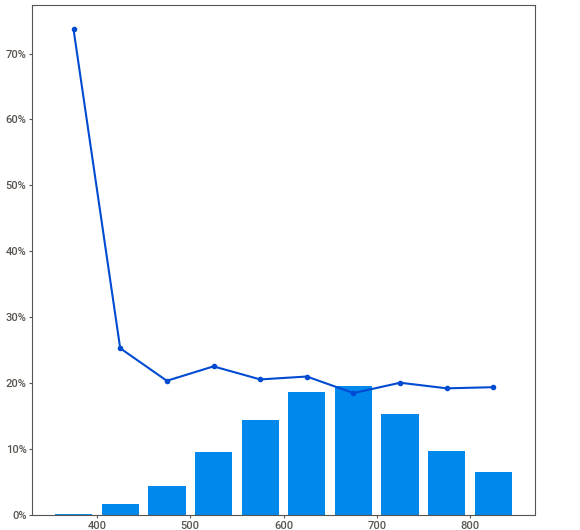
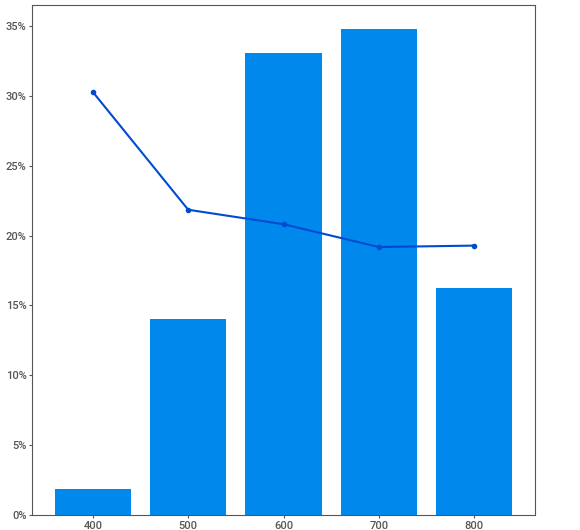
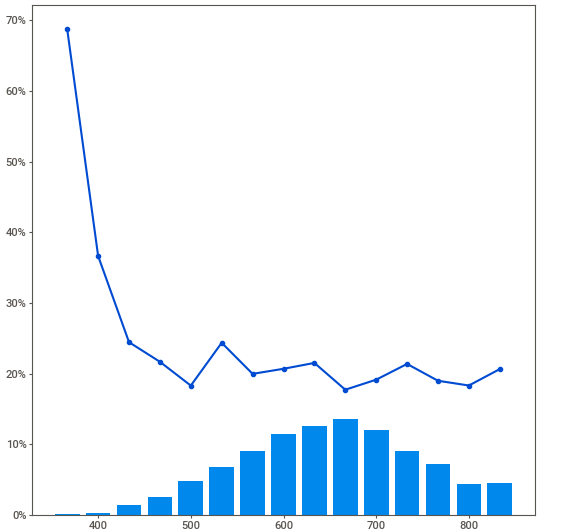
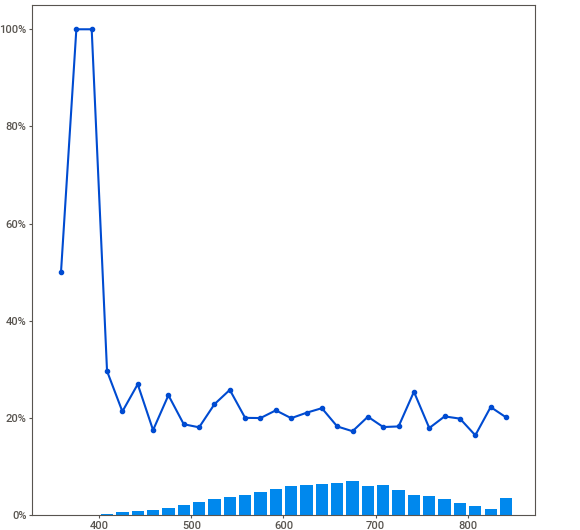
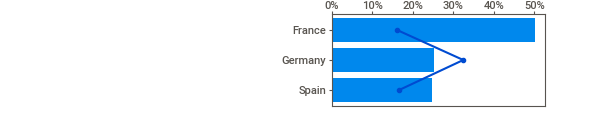
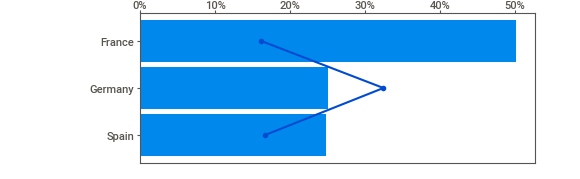
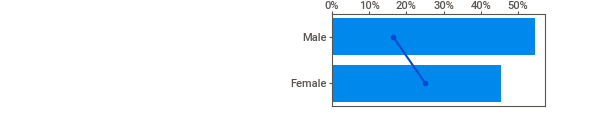
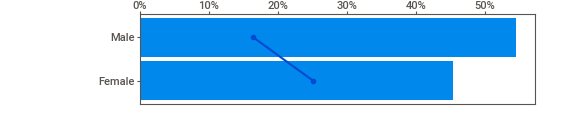
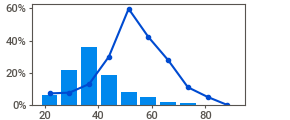
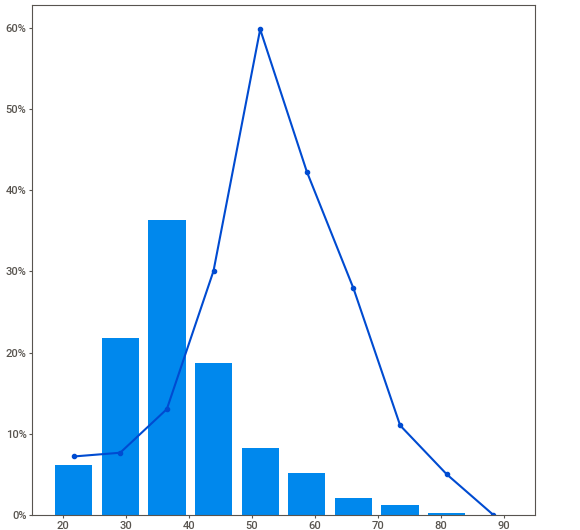
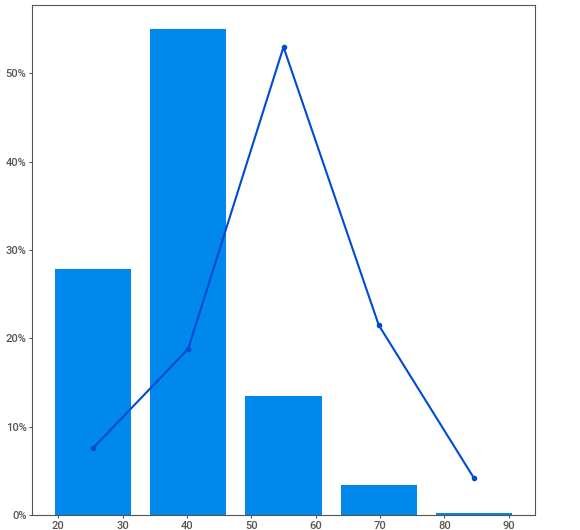
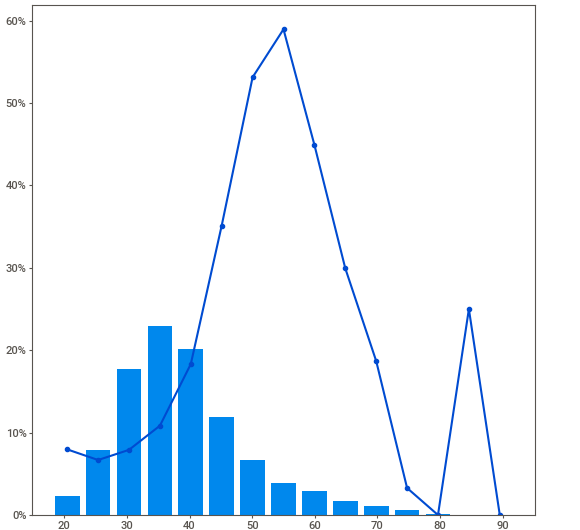
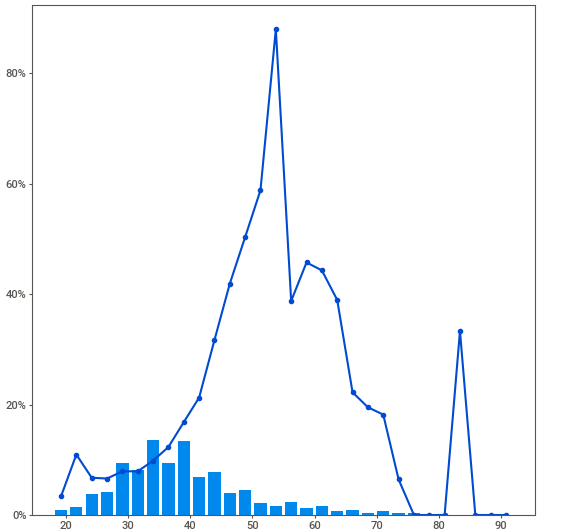
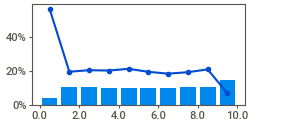
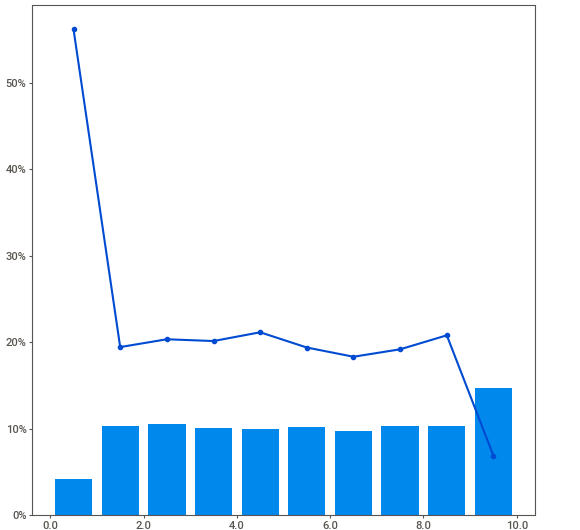
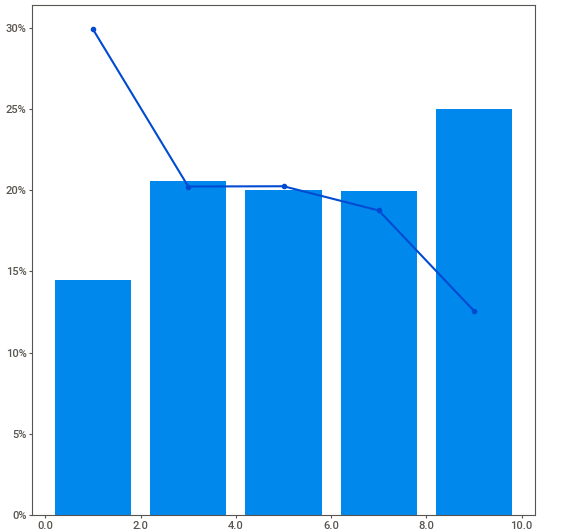
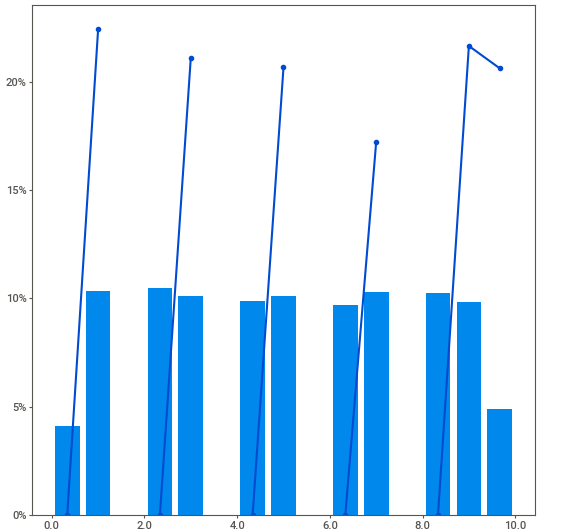
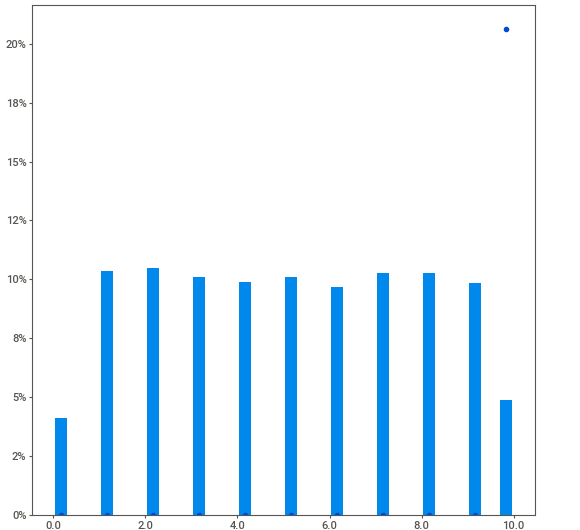
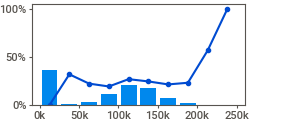
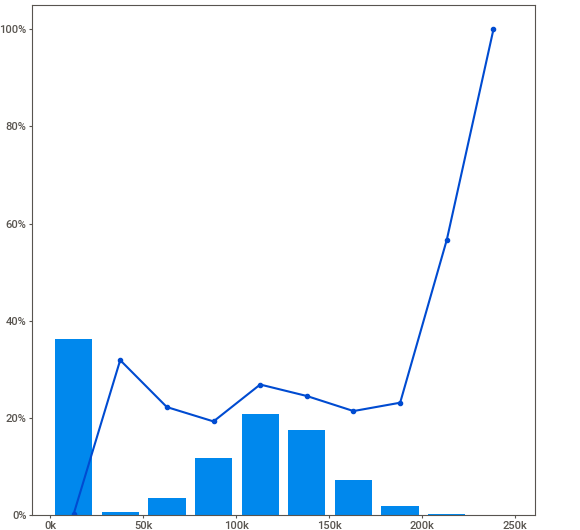
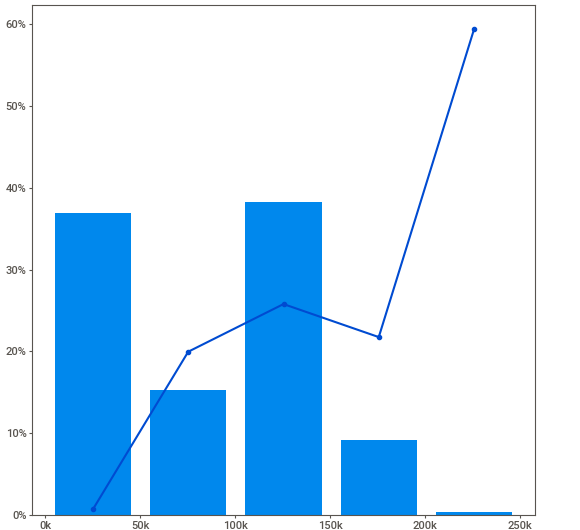
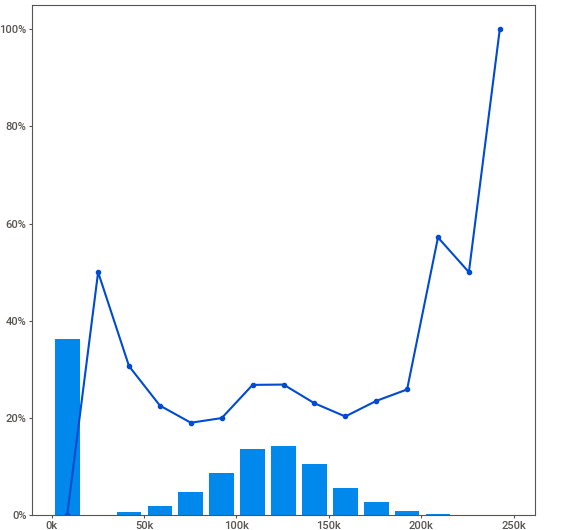
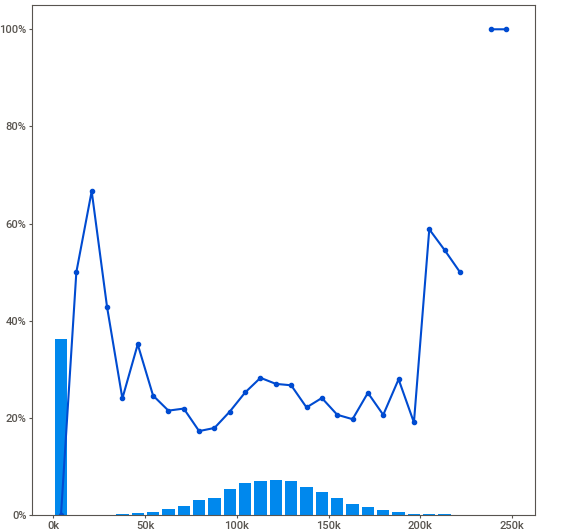
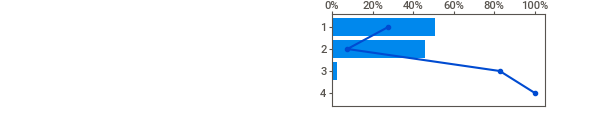
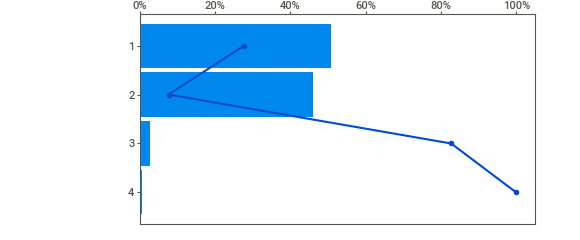
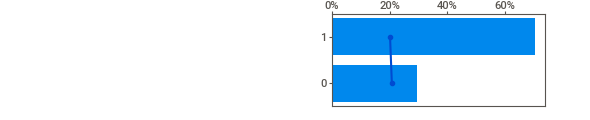
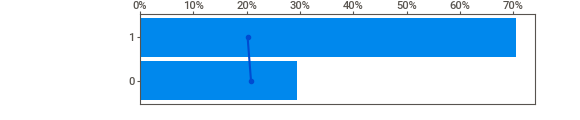
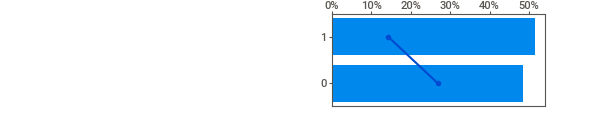
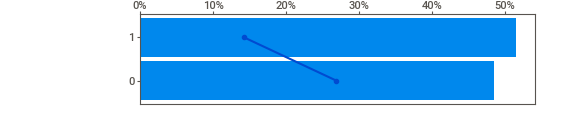
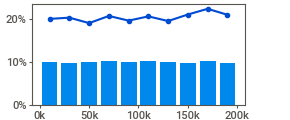
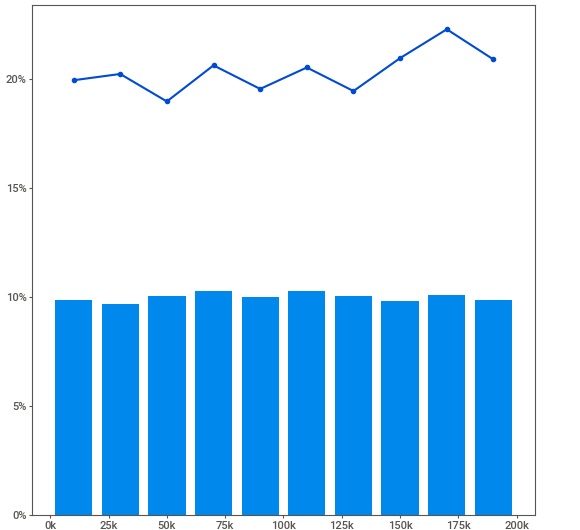
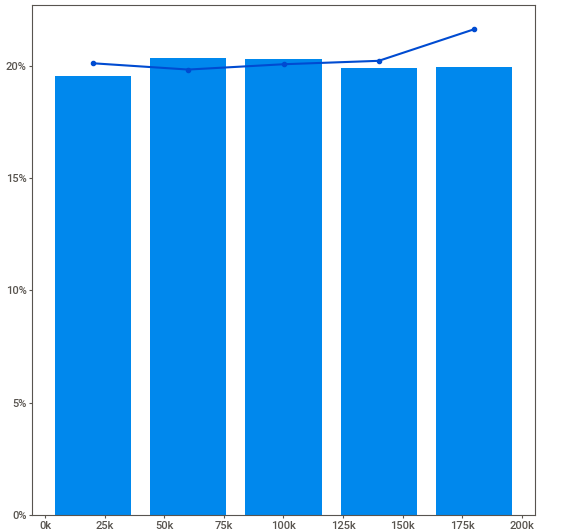
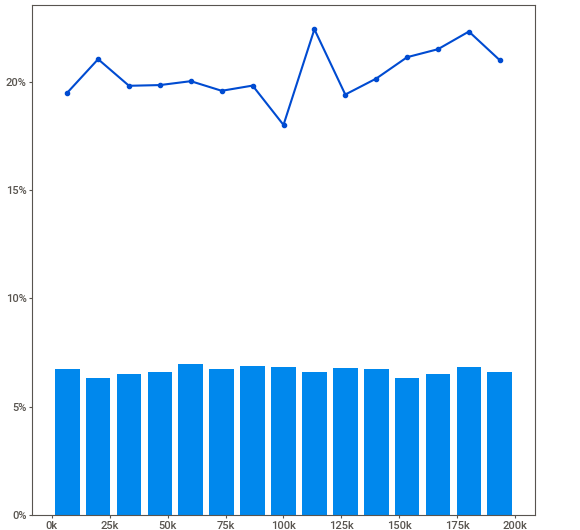
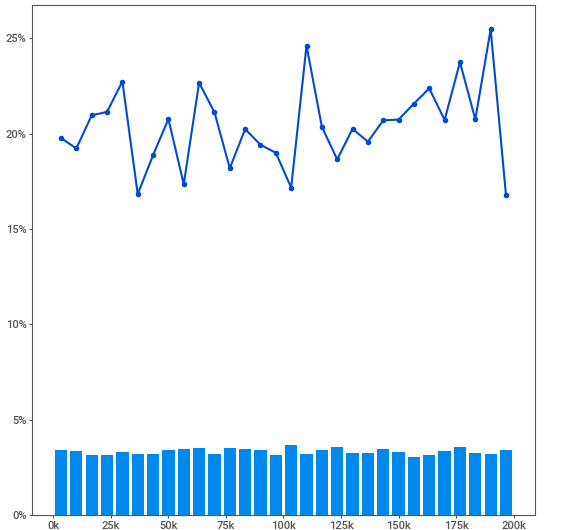
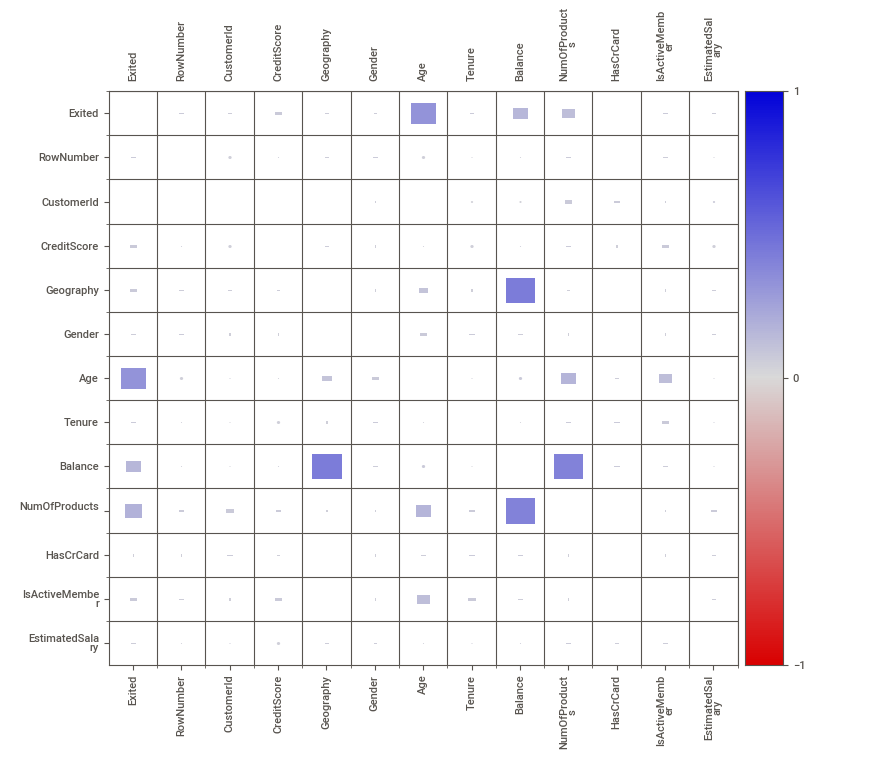
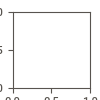

In [21]:
eda.show_notebook()

---
## **Pré-processamento para Machine Learning**

Em Machine Learning, é comum utilizarmos conjuntos de dados 100% numéricos para que fique adequado para qualquer modelo que se deseje utilizar. Isso significa que não pode haver dados faltantes e nem variáveis do tipo string (ou outros tipos que não sejam numéricos). 



---
### **PP1 - Descarte de variáveis não importantes**

In [22]:
# dropando as variaveis de interesse
dados.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)


In [23]:
dados.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


---
### **PP2 - Verificação de dados faltantes**

In [24]:
dados.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [25]:
import missingno as missing

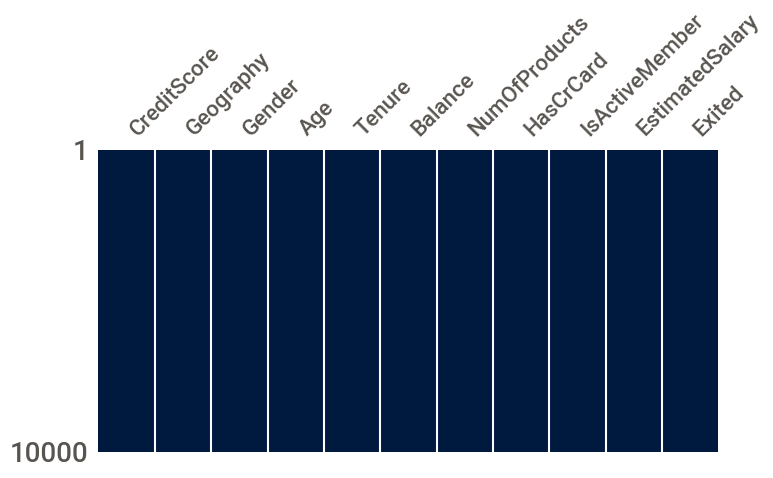

In [26]:
missing.matrix(dados, figsize = (8, 4), color = (0, 0.1, 0.25), sparkline = False);

---
### **PP3 - Categorização de variáveis continuas**

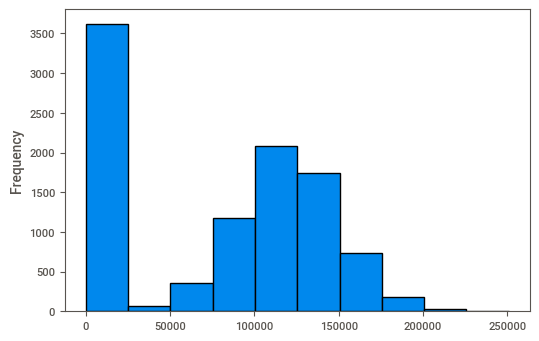

In [27]:
dados['Balance'].plot(kind = 'hist', edgecolor = 'black')

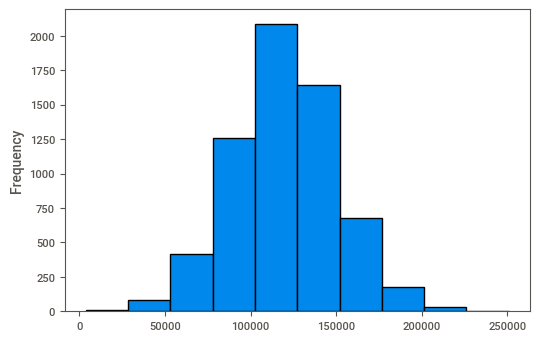

In [28]:
dados[dados['Balance'] > 0]['Balance'].plot(kind = 'hist', edgecolor = 'black')

In [29]:
dados[dados['Balance'] > 0]['Balance'].describe()

count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: Balance, dtype: float64

In [30]:
def auxiliar(x):
    if x == 0:
        return 'Zerada'
    elif x < 100000:
        return 'Até 100k'
    elif x < 150000:
        return '100k - 150k'
    else:
        return '150k+'

dados['Balance'] = dados['Balance'].apply(auxiliar)
dados.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,Zerada,1,1,1,101348.88,1
1,608,Spain,Female,41,1,Até 100k,1,0,1,112542.58,0
2,502,France,Female,42,8,150k+,3,1,0,113931.57,1
3,699,France,Female,39,1,Zerada,2,0,0,93826.63,0
4,850,Spain,Female,43,2,100k - 150k,1,1,1,79084.10,0


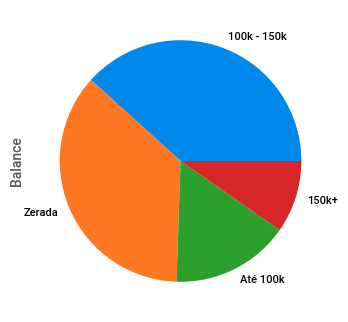

In [31]:
dados['Balance'].value_counts().plot(kind ='pie')

---
### **PP4 - Agrupamento de Categorias**

In [32]:
dados.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,Zerada,1,1,1,101348.88,1
1,608,Spain,Female,41,1,Até 100k,1,0,1,112542.58,0
2,502,France,Female,42,8,150k+,3,1,0,113931.57,1
3,699,France,Female,39,1,Zerada,2,0,0,93826.63,0
4,850,Spain,Female,43,2,100k - 150k,1,1,1,79084.10,0


In [33]:
dados['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [34]:
def auxiliar(x):
    if x <= 3:
        return '0-3'
    elif x <= 6:
        return '4-6'
    else:
        return '7-10'

dados['Tenure'] = dados['Tenure'].apply(auxiliar)

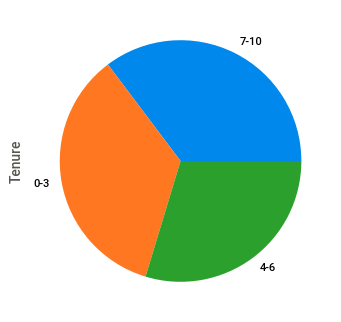

In [35]:
dados['Tenure'].value_counts().plot(kind = 'pie');

In [36]:
dados['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [37]:
def auxiliar(x):
    if x == 1:
        return 'NumProd1'
    else:
        return 'NumProd2+'

dados['NumOfProducts'] = dados['NumOfProducts'].apply(auxiliar)

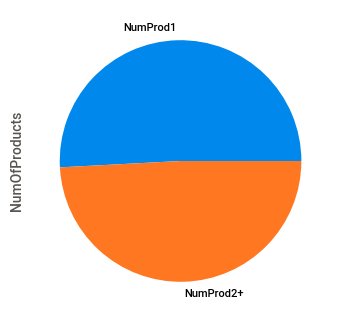

In [38]:
dados['NumOfProducts'].value_counts().plot(kind = 'pie');

In [39]:
dados.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,0-3,Zerada,NumProd1,1,1,101348.88,1
1,608,Spain,Female,41,0-3,Até 100k,NumProd1,0,1,112542.58,0
2,502,France,Female,42,7-10,150k+,NumProd2+,1,0,113931.57,1
3,699,France,Female,39,0-3,Zerada,NumProd2+,0,0,93826.63,0
4,850,Spain,Female,43,0-3,100k - 150k,NumProd1,1,1,79084.10,0


---
### **PP5 - Dummyficação de Variáveis**

In [40]:
pd.get_dummies(dados['Tenure'])

,0-3,4-6,7-10
0,1,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0
...,...,...,...
9995,0,1,0
9996,0,0,1
9997,0,0,1
9998,1,0,0


In [41]:
variaveis_cat = ['Geography', 'Gender', 'Tenure', 'Balance', 'NumOfProducts']
dados = pd.get_dummies(dados, columns = variaveis_cat, drop_first = True)

In [42]:
dados.head()

,CreditScore,Age,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,Tenure_4-6,Tenure_7-10,Balance_150k+,Balance_Até 100k,Balance_Zerada,NumOfProducts_NumProd2+
0,619,42,1,1,101348.88,1,0,0,0,0,0,0,0,1,0
1,608,41,0,1,112542.58,0,0,1,0,0,0,0,1,0,0
2,502,42,1,0,113931.57,1,0,0,0,0,1,1,0,0,1
3,699,39,0,0,93826.63,0,0,0,0,0,0,0,0,1,1
4,850,43,1,1,79084.10,0,0,1,0,0,0,0,0,0,0


---
### **PP6 - Controlando a Escala das Variáveis Contínuas**

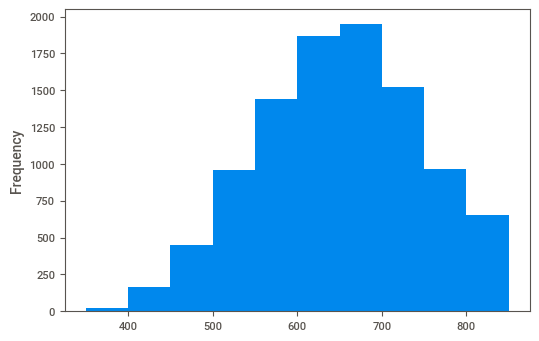

In [43]:
dados['CreditScore'].plot(kind = 'hist')

In [44]:
dados['CreditScore'] = dados['CreditScore']/1000 

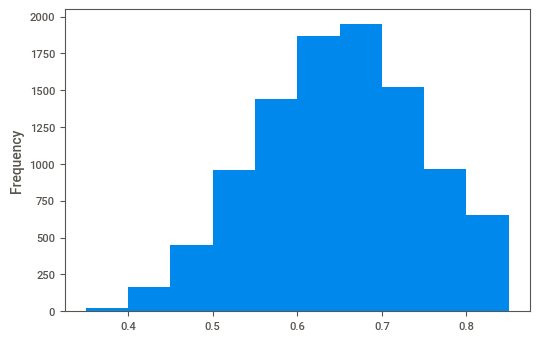

In [45]:
dados['CreditScore'].plot(kind = 'hist')

---

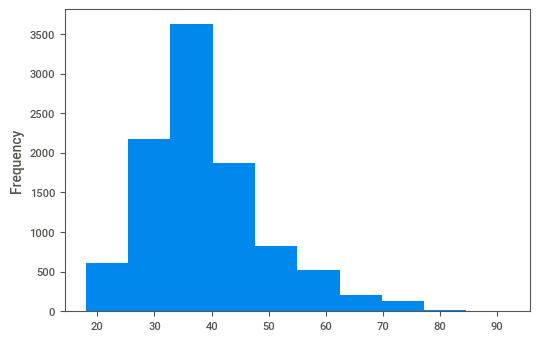

In [46]:
dados['Age'].plot(kind = 'hist');

In [47]:
import numpy as np
media = np.mean(dados['Age'])
desvio = np.std(dados['Age'])
dados['Age'] = (dados['Age'] - media)/desvio

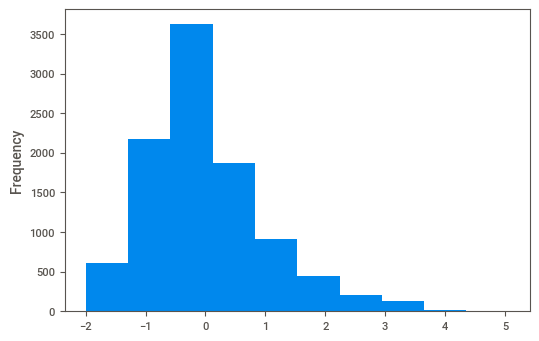

In [48]:
dados['Age'].plot(kind = 'hist');

---

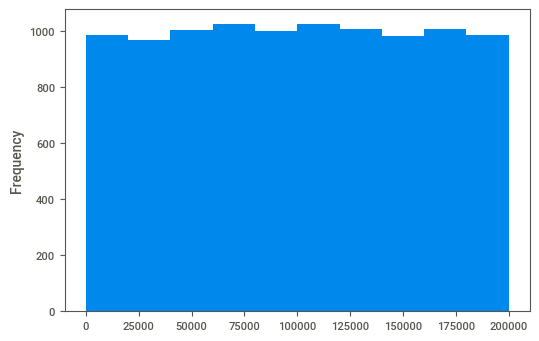

In [49]:
dados['EstimatedSalary'].plot(kind = 'hist');

In [50]:
dados['EstimatedSalary'] = dados['EstimatedSalary']/100000

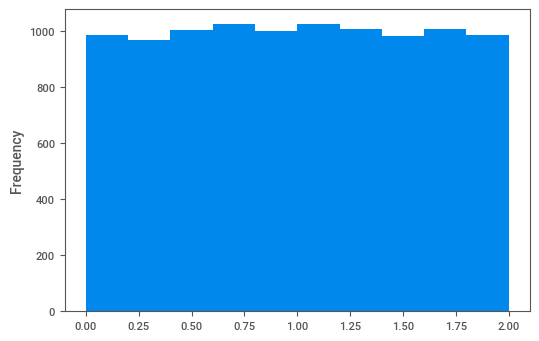

In [51]:
dados['EstimatedSalary'].plot(kind = 'hist');

In [52]:
dados.head()

,CreditScore,Age,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,Tenure_4-6,Tenure_7-10,Balance_150k+,Balance_Até 100k,Balance_Zerada,NumOfProducts_NumProd2+
0,0.619,0.293517,1,1,1.013489,1,0,0,0,0,0,0,0,1,0
1,0.608,0.198164,0,1,1.125426,0,0,1,0,0,0,0,1,0,0
2,0.502,0.293517,1,0,1.139316,1,0,0,0,0,1,1,0,0,1
3,0.699,0.007457,0,0,0.938266,0,0,0,0,0,0,0,0,1,1
4,0.850,0.388871,1,1,0.790841,0,0,1,0,0,0,0,0,0,0


In [53]:
dados.describe()

,CreditScore,Age,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,Tenure_4-6,Tenure_7-10,Balance_150k+,Balance_Até 100k,Balance_Zerada,NumOfProducts_NumProd2+
count,10000.000000,1.000000e+04,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.650529,2.404521e-16,0.70550,0.515100,1.000902,0.203700,0.250900,0.247700,0.545700,0.29680,0.352700,0.096900,0.158400,0.361700,0.491600
std,0.096653,1.000050e+00,0.45584,0.499797,0.575105,0.402769,0.433553,0.431698,0.497932,0.45687,0.477834,0.295836,0.365134,0.480517,0.499954
min,0.350000,-1.994969e+00,0.00000,0.000000,0.000116,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.584000,-6.600185e-01,0.00000,0.000000,0.510021,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.652000,-1.832505e-01,1.00000,1.000000,1.001939,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.718000,4.842246e-01,1.00000,1.000000,1.493882,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,0.000000,0.000000,1.000000,1.000000
max,0.850000,5.061197e+00,1.00000,1.000000,1.999925,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


## **Revendo a EDA**

                                             |          | [  0%]   00:00 -> (? left)


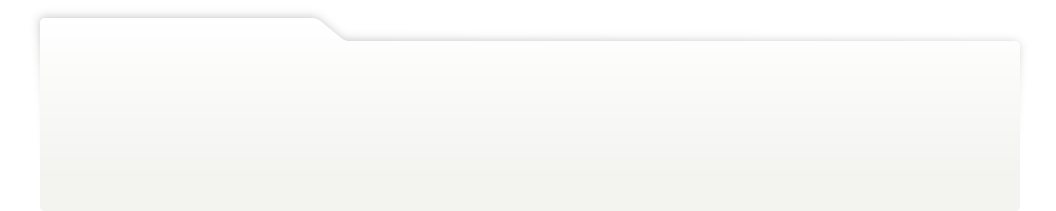
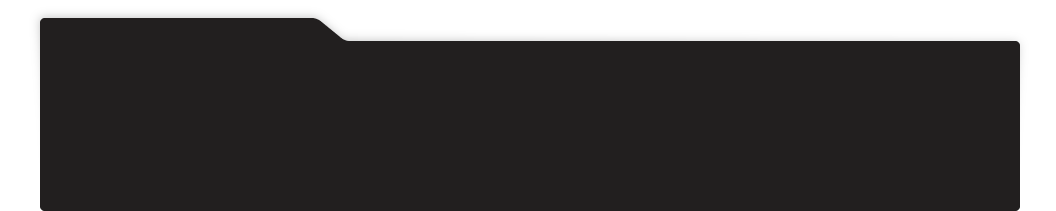
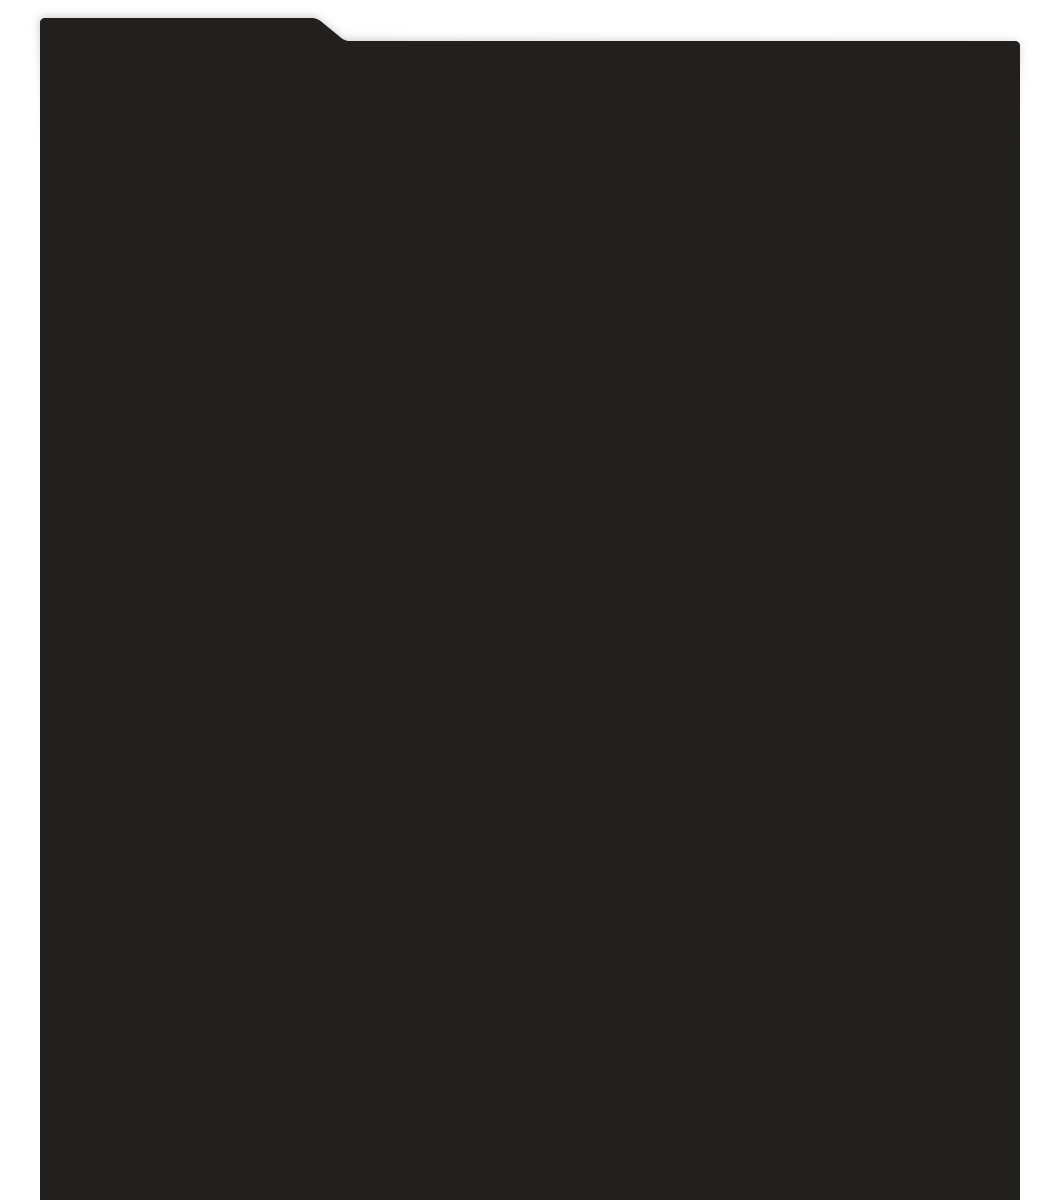
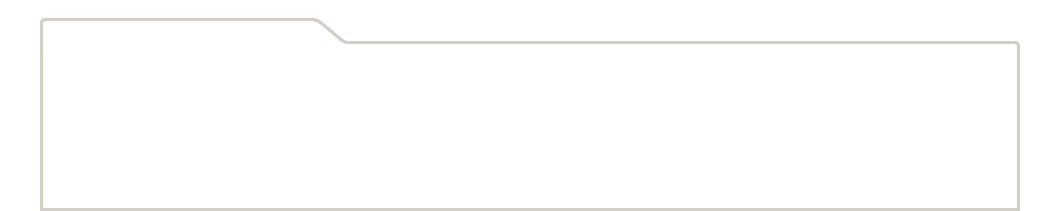
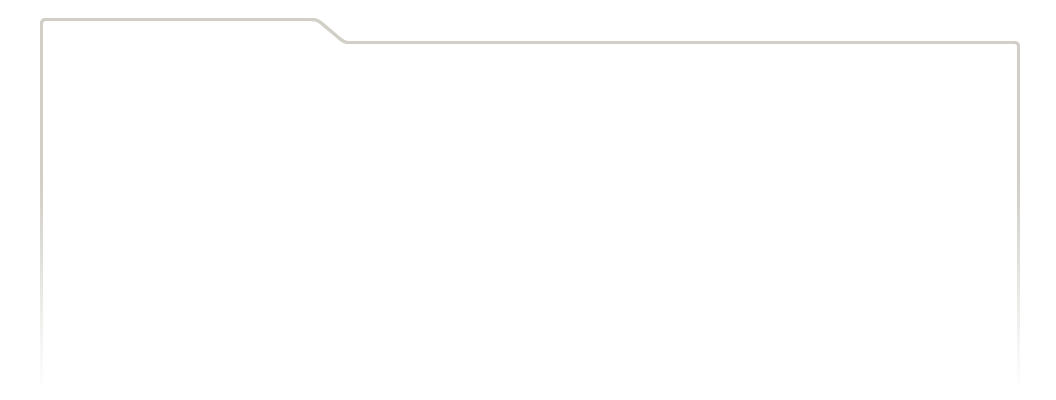
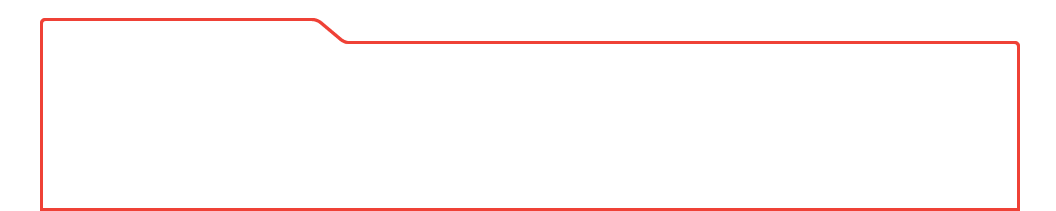
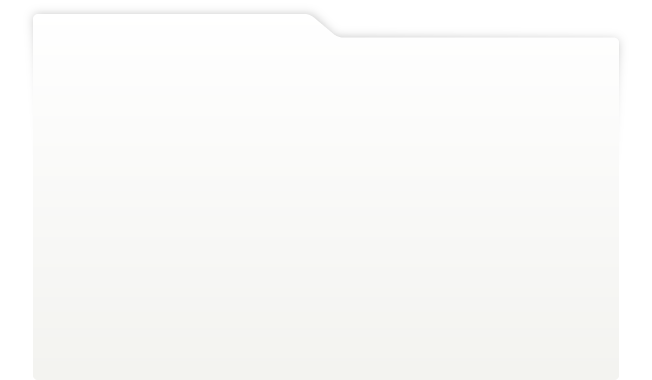
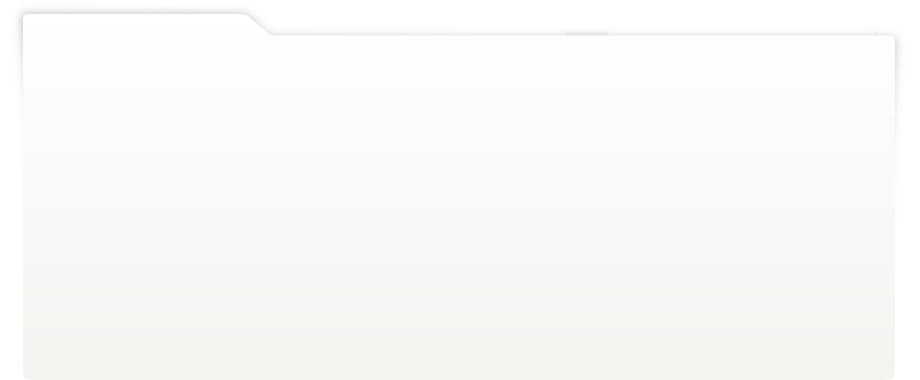
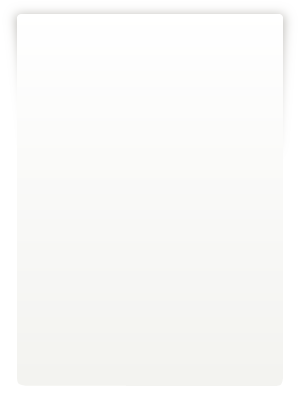
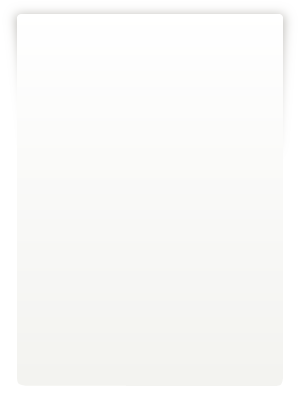
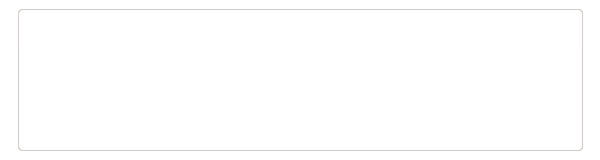
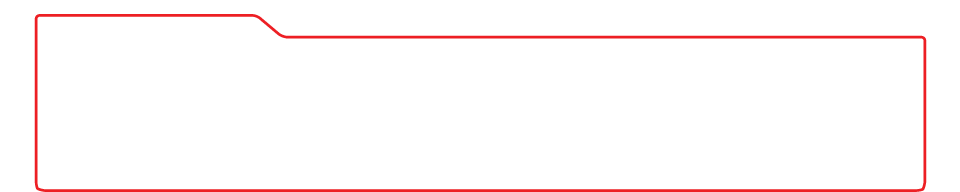
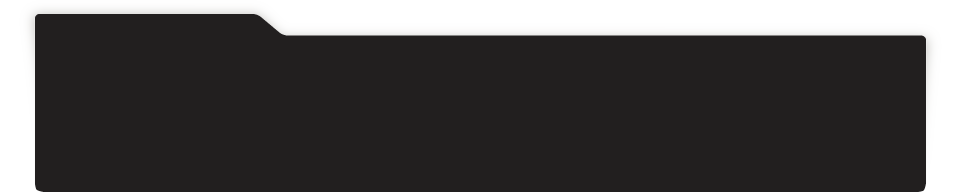
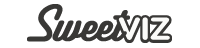
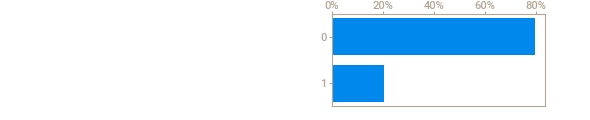
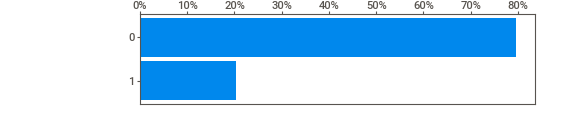
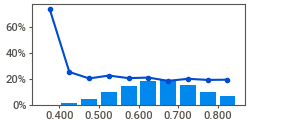
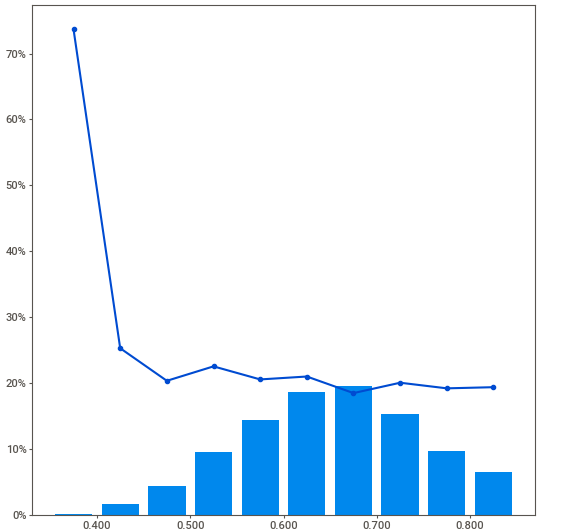
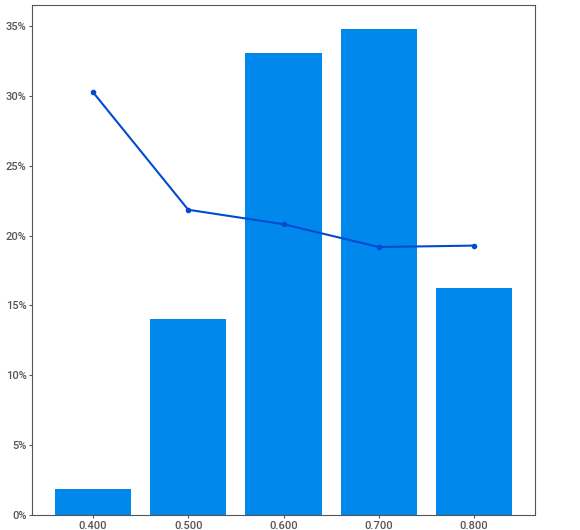
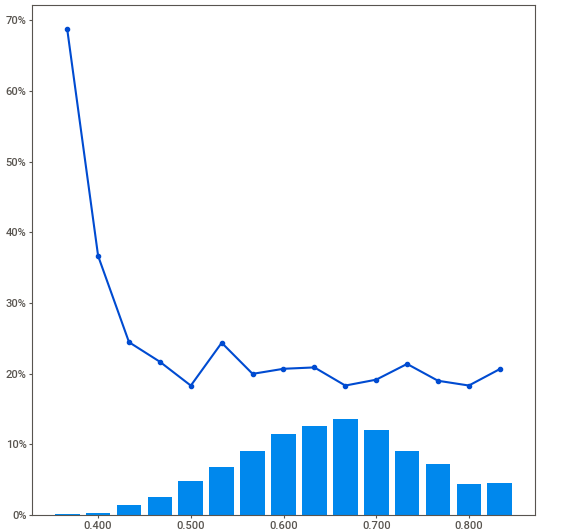
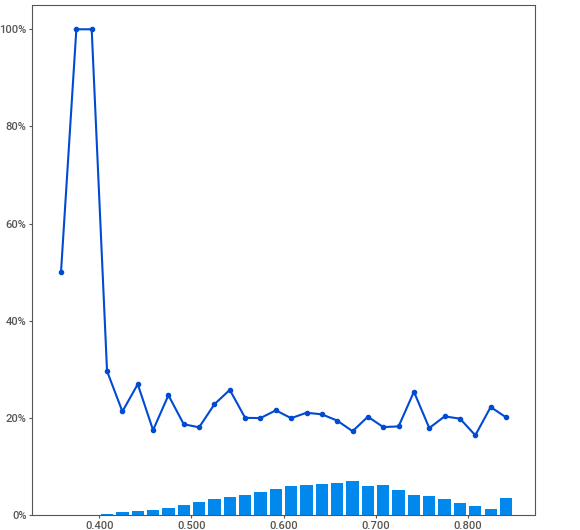
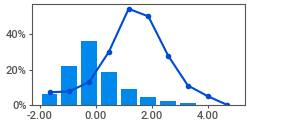
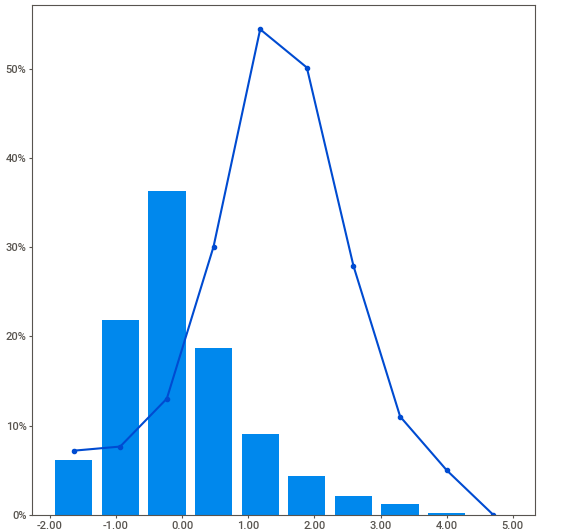
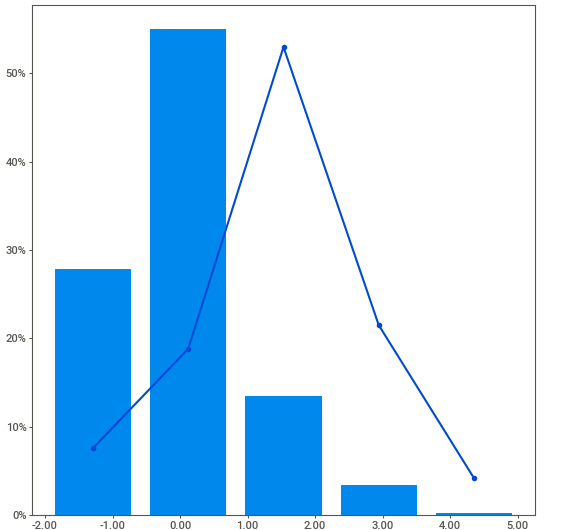
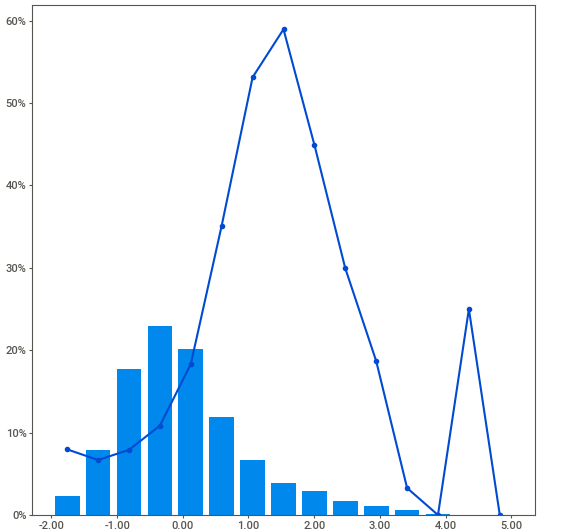
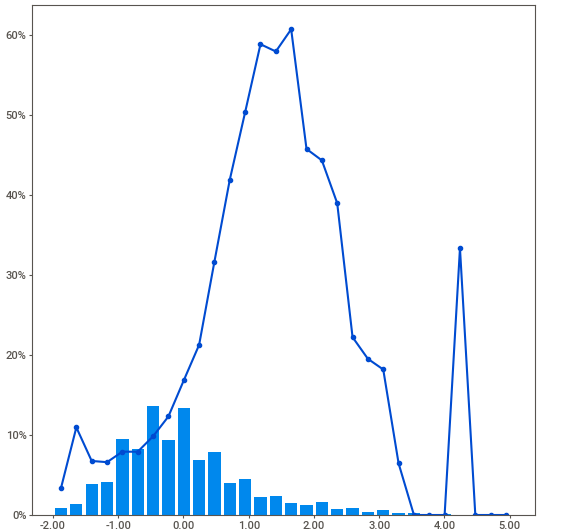
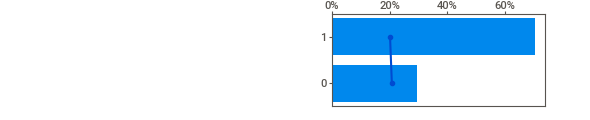
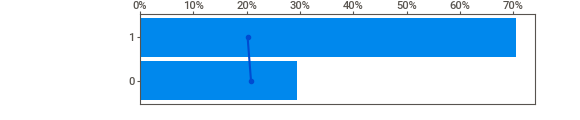
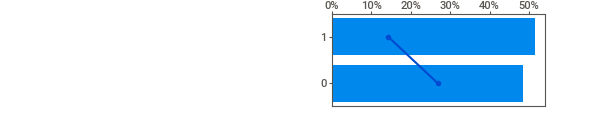
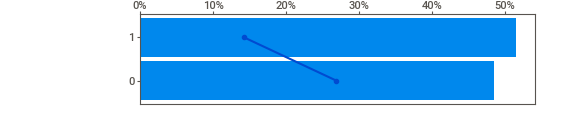
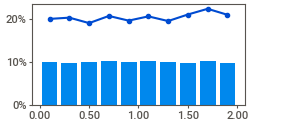
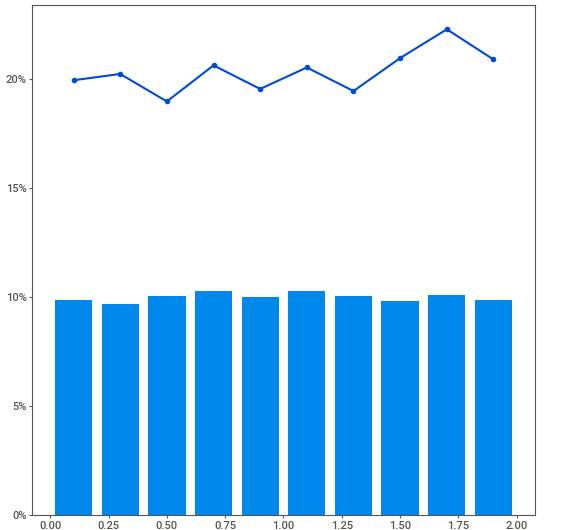
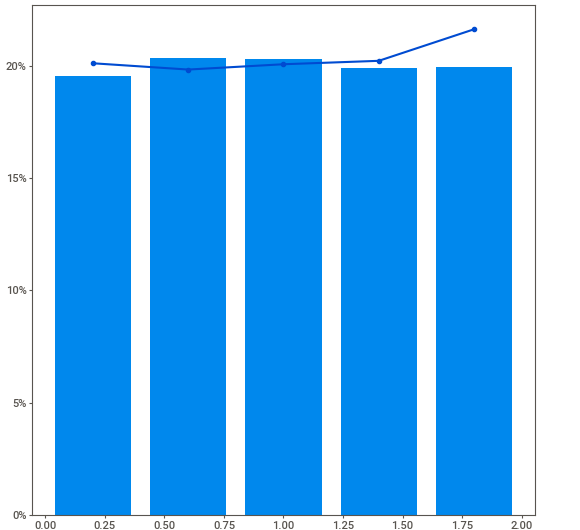
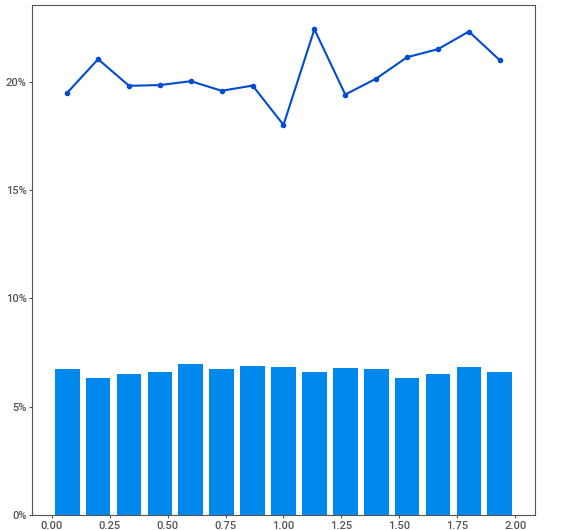
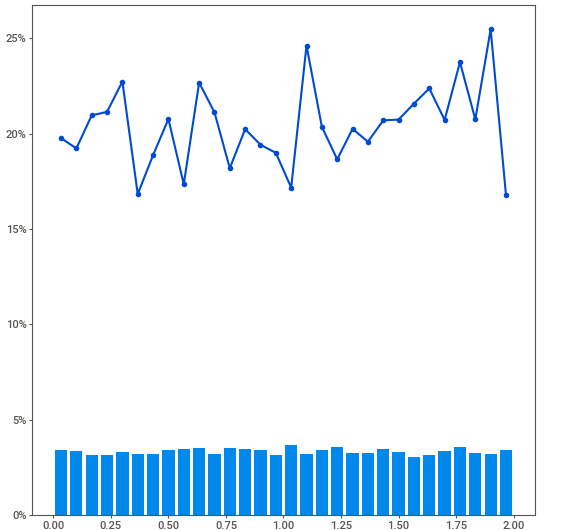
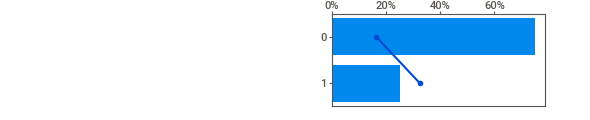
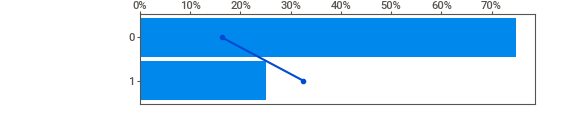
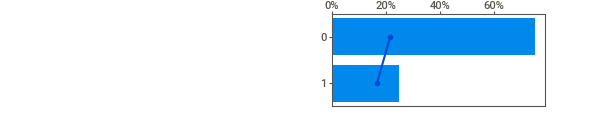
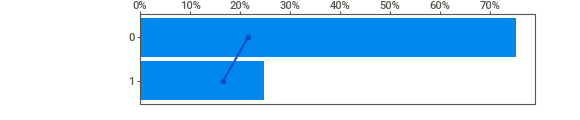
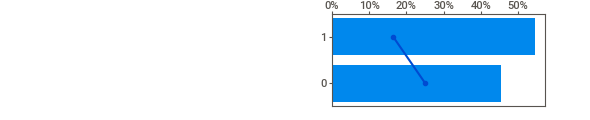
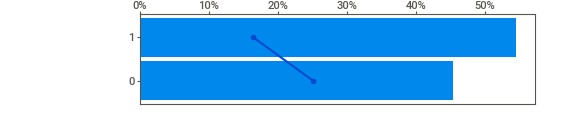
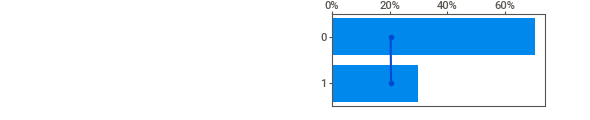
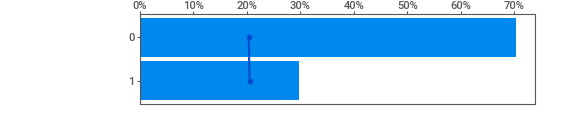
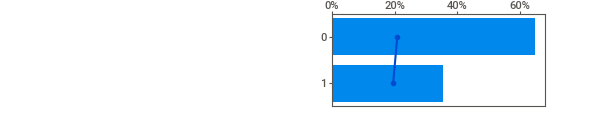
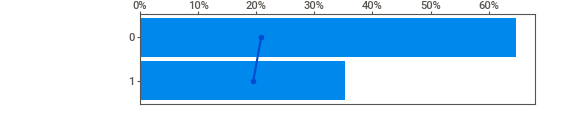
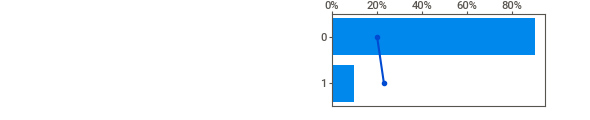
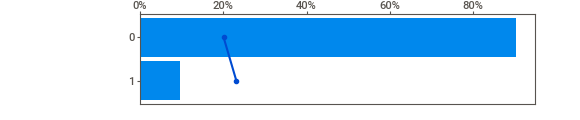
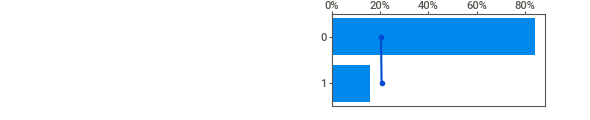
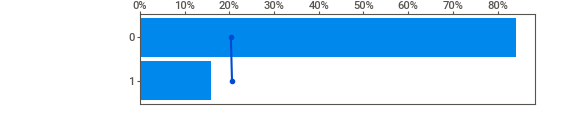
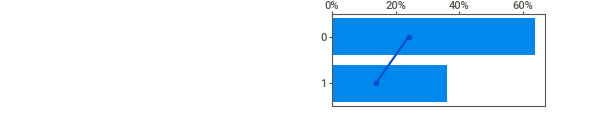
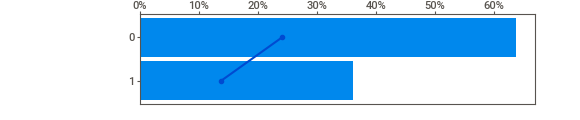
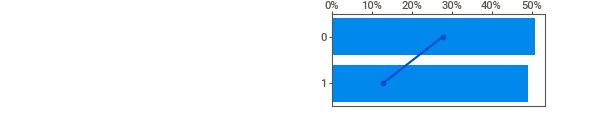
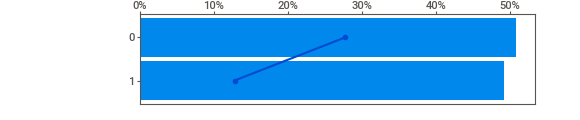
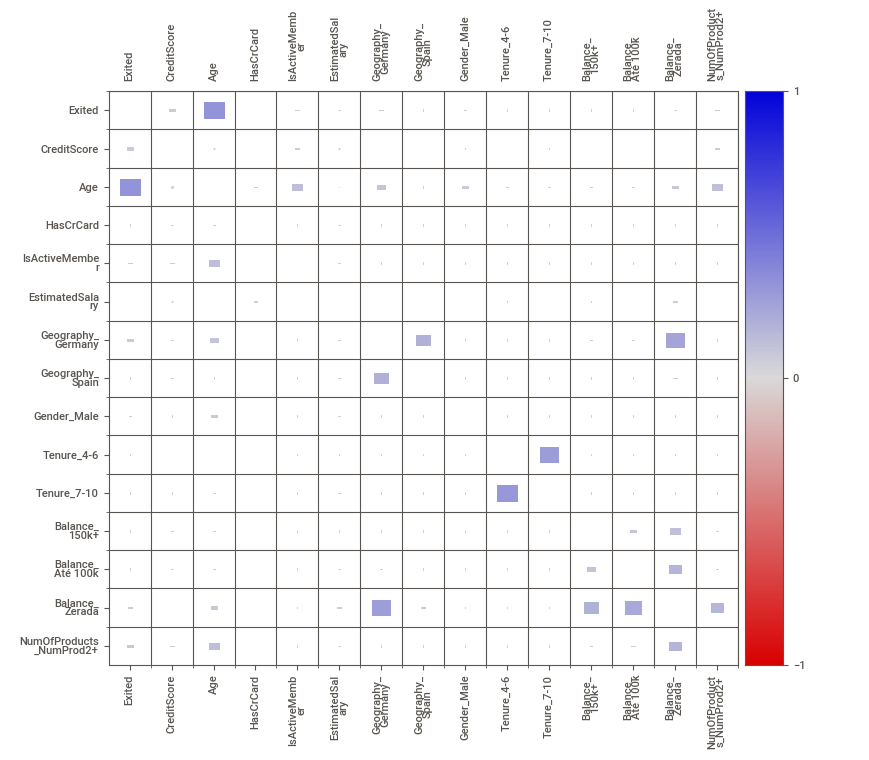
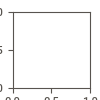

In [54]:
eda = sv.analyze(source = dados, target_feat = 'Exited')
eda.show_notebook()

## **Machine Learning**

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier 

In [56]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

In [57]:
# Combinação por votos 'Hard'
from sklearn.ensemble import VotingClassifier

# Combinação por votos 'Soft'
from sklearn.ensemble import VotingClassifier


# Configuração da Validação Cruzada
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np

In [59]:
X = dados.drop('Exited', axis = 1)
y = dados['Exited']

lista_de_medidas = ['accuracy', 'recall', 'precision', 'balanced_accuracy', 'f1']
nome_das_medidas = ['acurácia', 'sensibilidade', 'precisão', 'eficiência', 'f1-score']

lista_de_modelos = [LogisticRegression(),
                        DecisionTreeClassifier(max_depth = 3),
                        DecisionTreeClassifier(max_depth = 5),
                        DecisionTreeClassifier(max_depth = 7),
                        KNeighborsClassifier(n_neighbors = 5),
                        KNeighborsClassifier(n_neighbors = 15),
                        KNeighborsClassifier(n_neighbors = 25),
                        BaggingClassifier(),
                        RandomForestClassifier(n_estimators=50, max_depth = 5),
                        RandomForestClassifier(n_estimators=50, max_depth = 7),
                        RandomForestClassifier(n_estimators=100, max_depth = 5),
                        RandomForestClassifier(n_estimators=100, max_depth = 7)]

nome_dos_modelos = ['Regressão Logística',
                        'Árvore (prof = 3)',
                        'Árvore (prof = 5)',
                        'Árvore (prof = 7)',
                        '5-NN',
                        '15-NN',
                        '25-NN',
                        'Bagging',
                        'Random Forest (arvs = 50, prof = 2)',
                        'Random Forest (arvs = 50, prof = 3)',
                        'Random Forest (arvs = 100, prof = 2)', 
                        'Random Forest (arvs = 100, prof = 3)']

resultados0 = {}

validacao = StratifiedKFold(n_splits = 10)


for i in range(len(lista_de_modelos)):
    print('Rodando modelo: ' + nome_dos_modelos[i])
    accs_vc = cross_validate(lista_de_modelos[i], X, y, cv = validacao, scoring = lista_de_medidas)

    acc = accs_vc['test_accuracy'].mean()
    sen = accs_vc['test_recall'].mean()
    vpp = accs_vc['test_precision'].mean()
    bac = accs_vc['test_balanced_accuracy'].mean()
    f1s = accs_vc['test_f1'].mean()

    resultados0[nome_dos_modelos[i]] = [acc, sen, vpp, f1s, bac]
    
resultados = pd.DataFrame(resultados0, index = nome_das_medidas).T


Rodando modelo: Regressão Logística
Rodando modelo: Árvore (prof = 3)
Rodando modelo: Árvore (prof = 5)
Rodando modelo: Árvore (prof = 7)
Rodando modelo: 5-NN
Rodando modelo: 15-NN
Rodando modelo: 25-NN
Rodando modelo: Bagging
Rodando modelo: Random Forest (arvs = 50, prof = 2)
Rodando modelo: Random Forest (arvs = 50, prof = 3)
Rodando modelo: Random Forest (arvs = 100, prof = 2)
Rodando modelo: Random Forest (arvs = 100, prof = 3)


In [60]:
resultados.sort_values(by = 'f1-score', ascending = False)

,acurácia,sensibilidade,precisão,eficiência,f1-score
Árvore (prof = 7),0.8352,0.380436,0.669829,0.482947,0.665980
5-NN,0.8224,0.390807,0.599257,0.471686,0.661811
15-NN,0.8373,0.348085,0.704647,0.465030,0.655269
Bagging,0.8255,0.364278,0.623618,0.458952,0.653883
25-NN,0.8385,0.331894,0.729734,0.454299,0.649999
Árvore (prof = 5),0.8363,0.322566,0.727065,0.442136,0.645147
"Random Forest (arvs = 100, prof = 3)",0.8410,0.298010,0.794260,0.431595,0.638960
"Random Forest (arvs = 50, prof = 3)",0.8401,0.295069,0.787490,0.427774,0.637300
Regressão Logística,0.8166,0.258717,0.621207,0.364165,0.609015
"Random Forest (arvs = 100, prof = 2)",0.8290,0.200828,0.842063,0.322740,0.595266


---
## **Exercícios Propostos**

- Verifique o desempenho de algumas combinações de modelos. Varie entre as combinações 'hard' e 'soft'!

---
**_#itstimetoflai_** 

In [61]:
kf = KFold(n_splits = 50, shuffle = True)

In [62]:
reglog = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 25)
arvore = DecisionTreeClassifier(max_depth = 3)

modelos = [('Reg. Log.', reglog), ('KNN', knn), ('Árvore', arvore)]

modelo = VotingClassifier(modelos, voting = 'hard')

accs = cross_val_score(modelo, X, y, cv = kf, scoring = 'accuracy')
mod4 = accs.mean()
print(mod4)

0.8345


In [63]:
reglog = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 25)
arvore = DecisionTreeClassifier(max_depth = 3)

modelos = [('Reg. Log.', reglog), ('KNN', knn), ('Árvore', arvore)]
modelo = VotingClassifier(estimators = modelos, voting = 'soft')

accs = cross_val_score(modelo, X, y, cv = kf, scoring = 'accuracy')
mod5 = accs.mean()
print(mod5)

0.8381000000000001


In [64]:
#Fazendo a Divisão em Teste e Treinamento
Xtreino, Xteste, Ytreino, Yteste = train_test_split(X, y, test_size = 0.20)

In [65]:
def MetricasClassBinaria(observado, predito):

    mc = confusion_matrix(observado, predito)
    vn, fp, fn, vp = mc.flatten()

    pre = observado.mean()
    acc = (vn + vp)/(vn + fp + fn + vp) 
    sen = vp/(vp + fn)
    esp = vn/(vn + fp)
    vpp = vp/(vp + fp)
    vpn = vn/(vn + fn) 
    mcc = (vp*vn - fp*fn)/np.sqrt((vp + fp)*(vp + fn)*(vn + fp)*(vn + fn))
    f1s = 2*vpp*sen/(vpp + sen) 
    efi = (sen + esp)/2

    print('  Prevalência de Positivos: {:.4f}'.format(pre))
    print('                  Acurácia: {:.4f}'.format(acc))
    print('             Sensibilidade: {:.4f}'.format(sen))
    print('            Especificidade: {:.4f}'.format(esp))
    print('  Valor Preditivo Positivo: {:.4f}'.format(vpp))
    print('  Valor Preditivo Negativo: {:.4f}'.format(vpn))
    print('Coef. de Corr. de Matthews: {:.4f}'.format(mcc))
    print('                  F1-Score: {:.4f}'.format(f1s))
    print('                Eficiência: {:.4f}'.format(efi))
 
    metricas = {'prevalência': pre, 'acurácia': acc, 'sensibilidade': sen, 
            'especificidade': esp, 'vpp': vpp, 'vpn': vpn, 'mcc': mcc,
            'f1-score': f1s, 'eficiência': efi}
 
    return metricas

In [70]:
modelo = LogisticRegression()
modelo.fit(Xtreino, Ytreino)
preditos = modelo.predict(Xteste)
metricas1 = MetricasClassBinaria(Yteste, preditos)

  Prevalência de Positivos: 0.2060
                  Acurácia: 0.8195
             Sensibilidade: 0.2985
            Especificidade: 0.9547
  Valor Preditivo Positivo: 0.6308
  Valor Preditivo Negativo: 0.8399
Coef. de Corr. de Matthews: 0.3452
                  F1-Score: 0.4053
                Eficiência: 0.6266


In [71]:
modelo = KNeighborsClassifier(n_neighbors = 25)
modelo.fit(Xtreino, Ytreino)
preditos = modelo.predict(Xteste)
metricas2 = MetricasClassBinaria(Yteste, preditos)

  Prevalência de Positivos: 0.2060
                  Acurácia: 0.8295
             Sensibilidade: 0.3398
            Especificidade: 0.9565
  Valor Preditivo Positivo: 0.6699
  Valor Preditivo Negativo: 0.8481
Coef. de Corr. de Matthews: 0.3918
                  F1-Score: 0.4509
                Eficiência: 0.6482


In [72]:
modelo = DecisionTreeClassifier(max_depth = 3)
modelo.fit(Xtreino, Ytreino)
preditos = modelo.predict(Xteste)
metricas3 = MetricasClassBinaria(Yteste, preditos)

  Prevalência de Positivos: 0.2060
                  Acurácia: 0.8250
             Sensibilidade: 0.1796
            Especificidade: 0.9924
  Valor Preditivo Positivo: 0.8605
  Valor Preditivo Negativo: 0.8234
Coef. de Corr. de Matthews: 0.3430
                  F1-Score: 0.2972
                Eficiência: 0.5860


In [66]:
modelo = VotingClassifier(estimators = [('Reg. Log.', reglog), ('KNN', knn), ('Árvore', arvore)], voting = 'hard')
modelo.fit(Xtreino, Ytreino)
preditos = modelo.predict(Xteste)
metricas4 = MetricasClassBinaria(Yteste, preditos)

  Prevalência de Positivos: 0.2060
                  Acurácia: 0.8375
             Sensibilidade: 0.2937
            Especificidade: 0.9786
  Valor Preditivo Positivo: 0.7806
  Valor Preditivo Negativo: 0.8423
Coef. de Corr. de Matthews: 0.4118
                  F1-Score: 0.4268
                Eficiência: 0.6361


In [67]:
modelo = VotingClassifier(estimators = [('Reg. Log.', reglog), ('KNN', knn), ('Árvore', arvore)], voting = 'soft')
modelo.fit(Xtreino, Ytreino)
preditos = modelo.predict(Xteste)
metricas5 = MetricasClassBinaria(Yteste, preditos)

  Prevalência de Positivos: 0.2060
                  Acurácia: 0.8360
             Sensibilidade: 0.2888
            Especificidade: 0.9780
  Valor Preditivo Positivo: 0.7727
  Valor Preditivo Negativo: 0.8413
Coef. de Corr. de Matthews: 0.4047
                  F1-Score: 0.4205
                Eficiência: 0.6334


In [73]:
modelo = BaggingClassifier(n_estimators = 100)
modelo.fit(Xtreino, Ytreino)
preditos = modelo.predict(Xteste)
metricas6 = MetricasClassBinaria(Yteste, preditos)

  Prevalência de Positivos: 0.2060
                  Acurácia: 0.8205
             Sensibilidade: 0.4078
            Especificidade: 0.9276
  Valor Preditivo Positivo: 0.5936
  Valor Preditivo Negativo: 0.8579
Coef. de Corr. de Matthews: 0.3891
                  F1-Score: 0.4835
                Eficiência: 0.6677


In [74]:
modelo = RandomForestClassifier(n_estimators = 200, max_depth = 7) 
modelo.fit(Xtreino, Ytreino)
preditos = modelo.predict(Xteste)
metricas7 = MetricasClassBinaria(Yteste, preditos)

  Prevalência de Positivos: 0.2060
                  Acurácia: 0.8425
             Sensibilidade: 0.3277
            Especificidade: 0.9761
  Valor Preditivo Positivo: 0.7803
  Valor Preditivo Negativo: 0.8484
Coef. de Corr. de Matthews: 0.4370
                  F1-Score: 0.4615
                Eficiência: 0.6519


In [77]:
 resultados0 = {'Regressão Logística': list(metricas1.values()),
              '25-Vizinhos + Próximos': list(metricas2.values()),
              'Árvore de Decisão': list(metricas3.values()),
              'Combinação Hard': list(metricas4.values()),
              'Combinação Soft': list(metricas5.values()),
              'Bagging': list(metricas6.values()),
              'Random Forest': list(metricas7.values())}
              
resultados = pd.DataFrame(resultados0, index = metricas1.keys()).T
resultados.sort_values(by = 'acurácia', ascending = False)

,prevalência,acurácia,sensibilidade,especificidade,vpp,vpn,mcc,f1-score,eficiência
Random Forest,0.206,0.8425,0.327670,0.976071,0.780347,0.848385,0.437003,0.461538,0.651870
Combinação Hard,0.206,0.8375,0.293689,0.978589,0.780645,0.842276,0.411835,0.426808,0.636139
Combinação Soft,0.206,0.8360,0.288835,0.977960,0.772727,0.841278,0.404739,0.420495,0.633397
25-Vizinhos + Próximos,0.206,0.8295,0.339806,0.956549,0.669856,0.848130,0.391801,0.450886,0.648177
Árvore de Decisão,0.206,0.8250,0.179612,0.992443,0.860465,0.823406,0.343021,0.297189,0.586027
Bagging,0.206,0.8205,0.407767,0.927582,0.593640,0.857892,0.389128,0.483453,0.667674
Regressão Logística,0.206,0.8195,0.298544,0.954660,0.630769,0.839889,0.345214,0.405272,0.626602


In [78]:
from google.colab.data_table import DataTable
DataTable(resultados.round(4))

,prevalência,acurácia,sensibilidade,especificidade,vpp,vpn,mcc,f1-score,eficiência
Regressão Logística,0.206,0.8195,0.2985,0.9547,0.6308,0.8399,0.3452,0.4053,0.6266
25-Vizinhos + Próximos,0.206,0.8295,0.3398,0.9565,0.6699,0.8481,0.3918,0.4509,0.6482
Árvore de Decisão,0.206,0.8250,0.1796,0.9924,0.8605,0.8234,0.3430,0.2972,0.5860
Combinação Hard,0.206,0.8375,0.2937,0.9786,0.7806,0.8423,0.4118,0.4268,0.6361
Combinação Soft,0.206,0.8360,0.2888,0.9780,0.7727,0.8413,0.4047,0.4205,0.6334
Bagging,0.206,0.8205,0.4078,0.9276,0.5936,0.8579,0.3891,0.4835,0.6677
Random Forest,0.206,0.8425,0.3277,0.9761,0.7803,0.8484,0.4370,0.4615,0.6519
